In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
# get the dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
flower_names = list(iris.target_names)
feature_names = list(iris.feature_names)

In [3]:
# dataset in a tabular format
pd.DataFrame(np.concatenate([X, y.reshape(-1,1)], axis=1), columns=feature_names + ['flower_index']).head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower_index
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
5,5.4,3.9,1.7,0.4,0.0
6,4.6,3.4,1.4,0.3,0.0
7,5.0,3.4,1.5,0.2,0.0
8,4.4,2.9,1.4,0.2,0.0
9,4.9,3.1,1.5,0.1,0.0


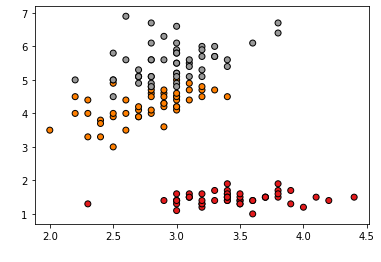

In [4]:
# graphical plot of two dimensions.
# feel free to change the indices to get a feel of all the columns
xindex = 1
yindex = 2
plt.scatter(X[:, xindex], X[:, yindex], c=y, cmap=plt.cm.Set1 ,edgecolor='k')
plt.xlabel(feature_names[xindex], color='white')
plt.ylabel(feature_names[yindex], color='white')
plt.show()

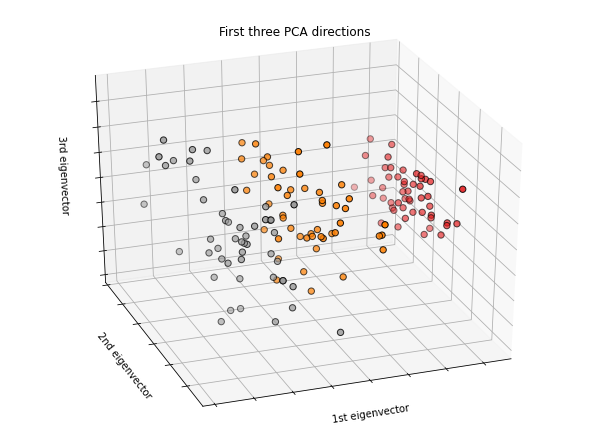

In [5]:
# 3 D PCA Visualisation.
# Code taken from sklearn documentation here - https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html

from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA


fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()


In [6]:
# LETS IMPLEMENT KNN Classifier

class KNNClassifier():

    def __init__(self, K=3, dist_val = 1):
        
        # K is the number of nearest points to consider
        self.K = K
        # dist_val is the value for choosing the type of distance function to use
        # 1 for abolute distance and 2 for euclidean distance
        self.dist_val = dist_val

    def fit(self, X, y):
        self.X = X
        self.y = y

    # utility function ( Absolute distance between 2 points )
    def abs_dist(self,x1, x2):
        return (np.sum(np.abs(x1-x2)))

    # utility function ( Euclidean distance between 2 points )
    def eucl_dist(self,x1, x2):
        return np.sqrt(np.sum((x1-x2)**2))

    def predict(self, X_test):

        preds = []
        for i in range(len(X_test)):

            # calculating the distance of the test sample with all the train samples
            if self.dist_val == 1:
                dists = np.array([self.abs_dist(X_test[i], x_t) for x_t in self.X])
            else:
                dists = np.array([self.eucl_dist(X_test[i], x_t) for x_t in self.X])


            # sorting the distances and getting K neighbours
            dist_sorted = np.array(dists).argsort()[:self.K]

            # now that we have nearest datapoints we have to find the most common class among them.
            # we will maintain a dict count for that
            neighs = {}
            for idx in dist_sorted:
                if self.y[idx] in neighs:
                    neighs[self.y[idx]] += 1
                else:
                    neighs[self.y[idx]] = 1

            
            # then find the class with max votes
            best_class = max(neighs, key = lambda x: neighs[x])

            # append it to preds
            preds.append(best_class)

        return preds
            
            
            


In [7]:
# Making a train split and fitting the train arrays
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = KNNClassifier(K=15, dist_val=2)
clf.fit(X_train, y_train)
  

In [8]:
# prediction
preds = clf.predict(X_test)

In [9]:
# final accuracy
print('Accuracy:', accuracy_score(y_test, preds))

Accuracy: 0.9666666666666667
